<a href="https://colab.research.google.com/github/KdrDrn/04-DVwPy/blob/main/09_DVwPy_Assignment_4DV_capstone_C8301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [ ]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [ ]:
df["cnt"].isnull().value_counts()

False    17414
Name: cnt, dtype: int64

In [ ]:
df.duplicated().value_counts()

False    17414
dtype: int64

False    17414
dtype: int64

In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

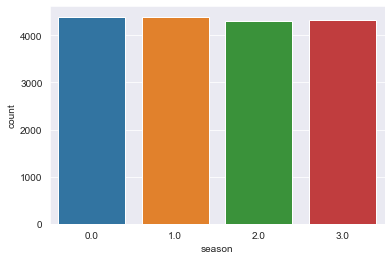

In [ ]:
sns.countplot(x = "season", data = df);

In [ ]:
# season

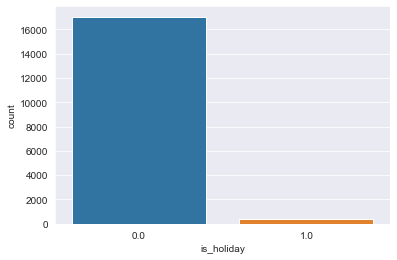

In [ ]:
sns.countplot(x = "is_holiday", data = df);

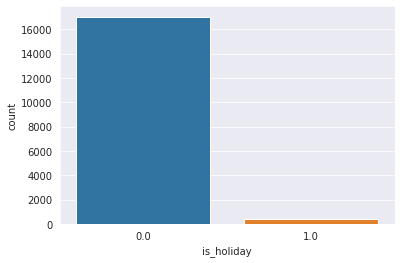

In [ ]:
# is_holiday

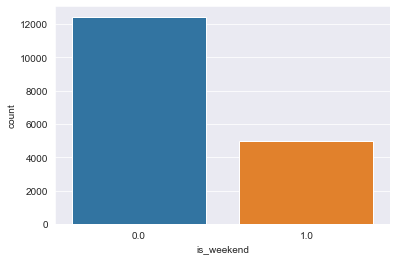

In [ ]:
sns.countplot(x = "is_weekend", data = df);

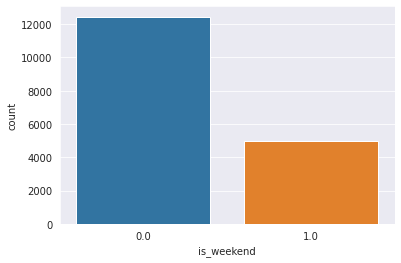

In [ ]:
# is_weekend

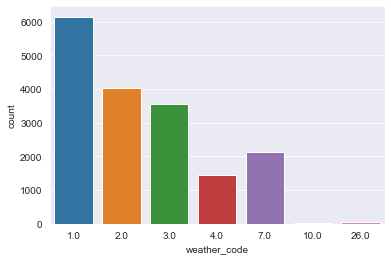

In [ ]:
sns.countplot(x = "weather_code", data = df);

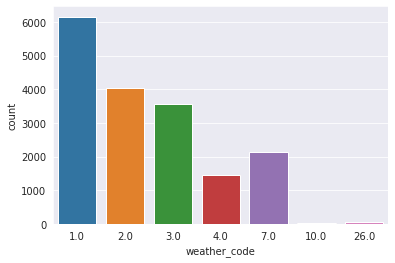

In [ ]:
# weather_code

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [ ]:
df_1 = df.copy()

df_1["timestamp"] = pd.to_datetime(df_1["timestamp"])
df_1.set_index("timestamp", inplace = True)

df_1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [ ]:
from datetime import datetime

df_1["year_month"] = df_1.index.strftime('%Y-%m')
df_1["year"] = df_1.index.year
df_1["month"] = df_1.index.month
df_1["day_of_month"] = df_1.index.day
df_1["day_of_week"] = df_1.index.day_of_week
df_1["hour"] = df_1.index.hour

df_1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

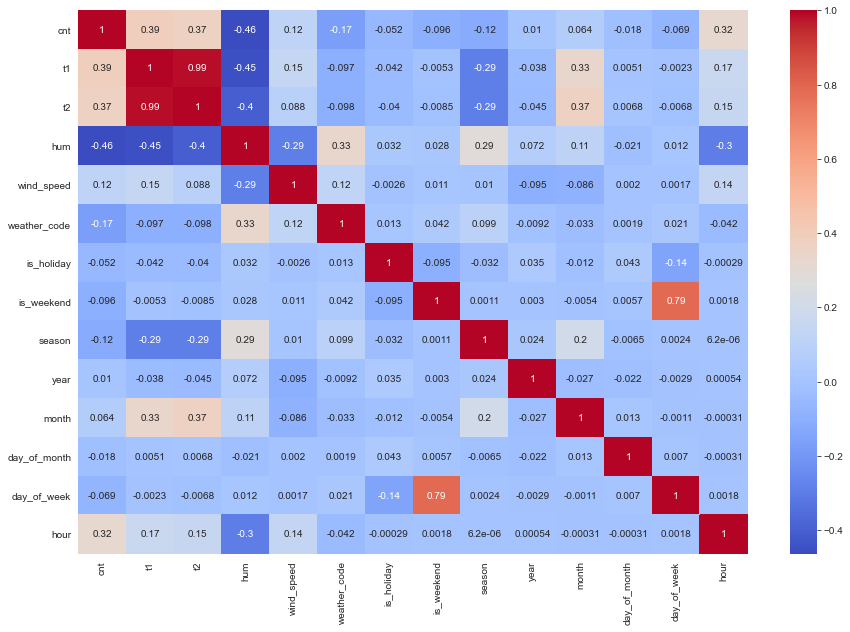

In [ ]:
df_1_corr = df_1.drop("year_month", axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(df_1.corr(), annot = True, cmap = 'coolwarm');

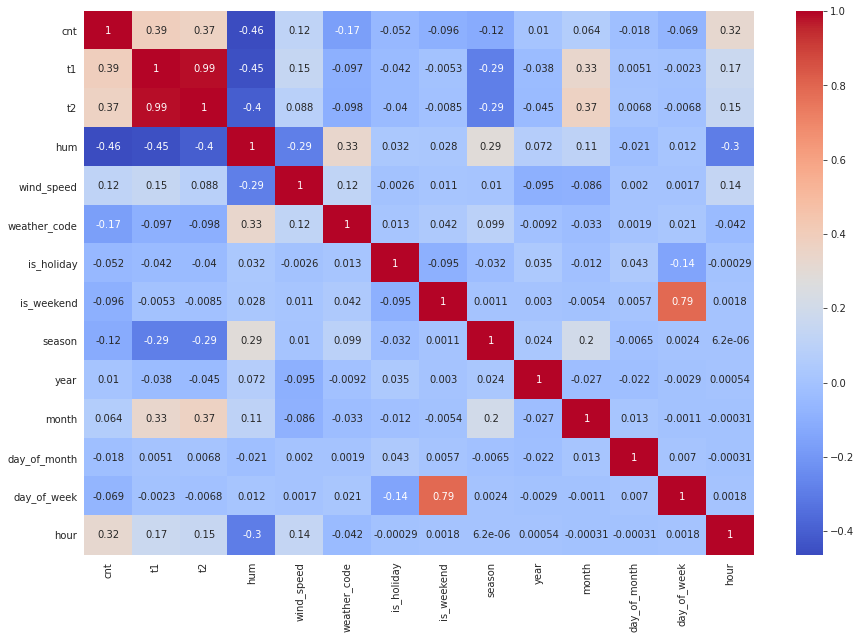

In [ ]:
# for all variables 

In [ ]:
target_variable = round(df_1_corr.corr().iloc[0].sort_values(ascending=False), 3)
target_variable

cnt             1.000
t1              0.389
t2              0.369
hour            0.324
wind_speed      0.116
month           0.064
year            0.010
day_of_month   -0.018
is_holiday     -0.052
day_of_week    -0.069
is_weekend     -0.096
season         -0.116
weather_code   -0.167
hum            -0.463
Name: cnt, dtype: float64

In [ ]:
target_variable.index

Index(['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
       'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
       'weather_code', 'hum'],
      dtype='object')

In [ ]:
target_variable.values

array([ 1.   ,  0.389,  0.369,  0.324,  0.116,  0.064,  0.01 , -0.018,
       -0.052, -0.069, -0.096, -0.116, -0.167, -0.463])

In [ ]:
target_variable_df = pd.DataFrame({"Cnt": [ 1.   ,  0.389,  0.369,  0.324,  0.116,  0.064,  0.01 , -0.018,
                                   -0.052, -0.069, -0.096, -0.116, -0.167, -0.463]},
                                    index=['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
                                    'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
                                    'weather_code', 'hum'])

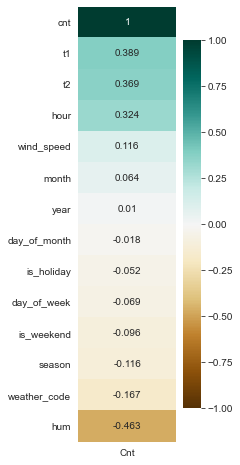

In [ ]:
plt.figure(figsize=(2.2,8))

sns.heatmap(target_variable_df, vmin=-1, vmax=1, annot=True, fmt="g", cmap = 'BrBG')

plt.show()

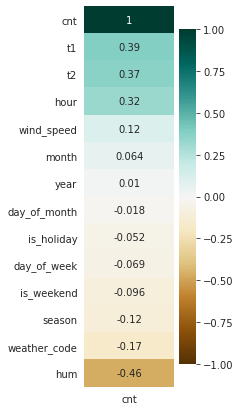

In [ ]:
# for the target variable

### 8. Visualize the correlation of the target variable and the other features with barplot

In [ ]:
target_variable = round(df_1_corr.corr().iloc[0].sort_values(), 3)
target_variable

hum            -0.463
weather_code   -0.167
season         -0.116
is_weekend     -0.096
day_of_week    -0.069
is_holiday     -0.052
day_of_month   -0.018
year            0.010
month           0.064
wind_speed      0.116
hour            0.324
t2              0.369
t1              0.389
cnt             1.000
Name: cnt, dtype: float64

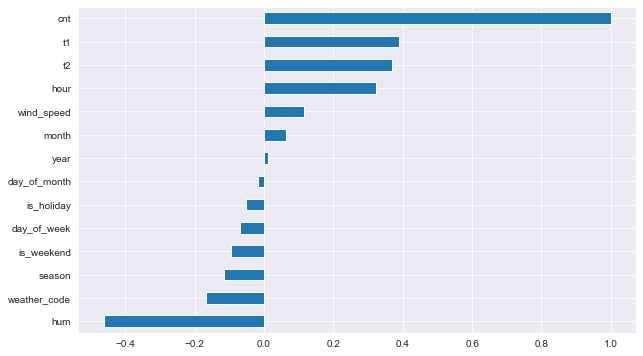

In [ ]:
target_variable.plot(x = target_variable.index, y = target_variable.values, kind = "barh", figsize = (10,6));

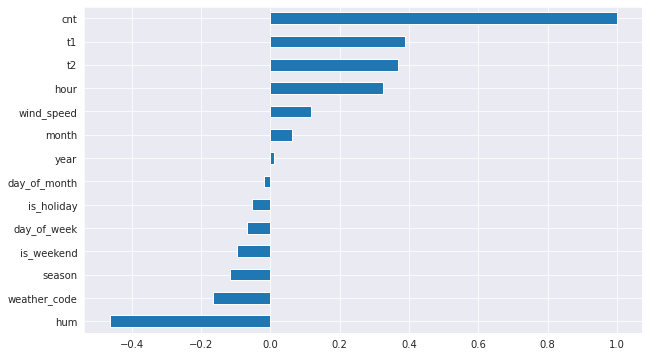

In [ ]:
#with pandas

### 9.Plot bike shares over time use lineplot

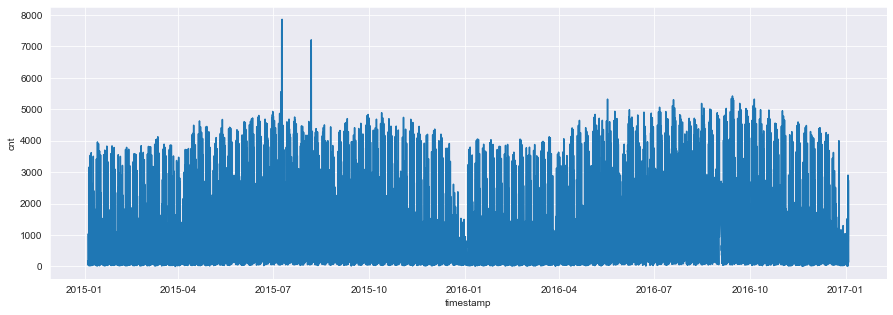

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df_1, x = df_1.index, y = "cnt")

plt.show()

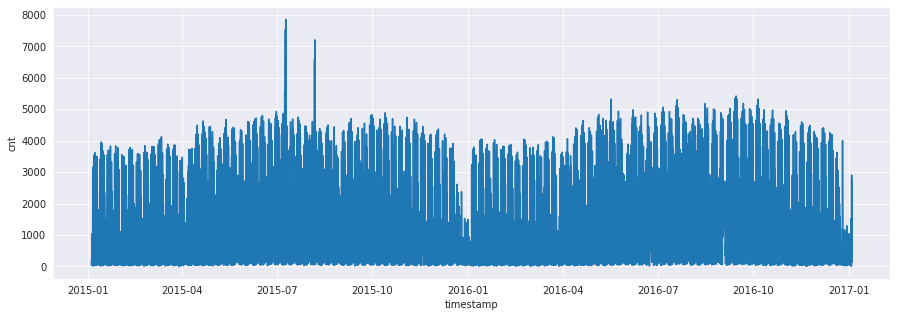

In [ ]:
# with lineplot

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [ ]:
df_1.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,2015.507810,6.514643,15.751981,2.99265,11.513265
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,0.508157,3.452509,8.793704,2.00406,6.915893
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,1.00000,6.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,2016.000000,7.000000,16.000000,3.00000,12.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,2016.000000,10.000000,23.000000,5.00000,18.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,2017.000000,12.000000,31.000000,6.00000,23.000000


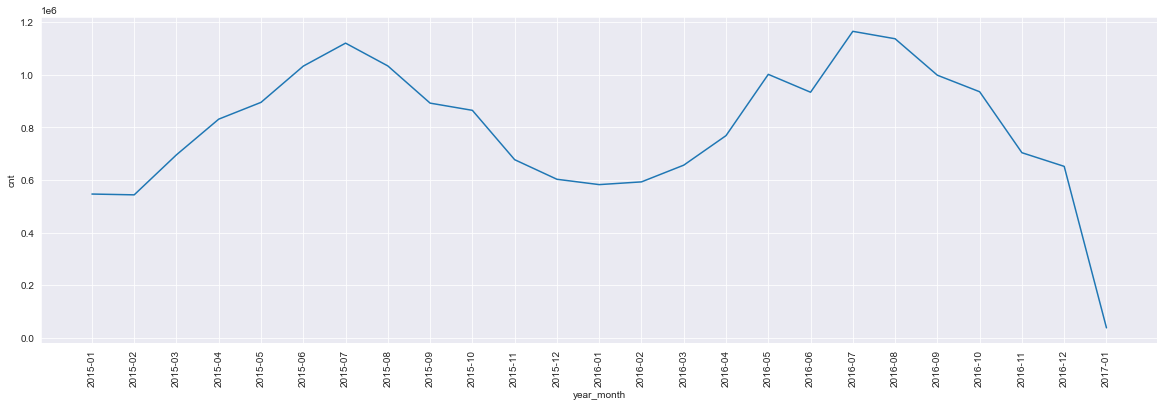

In [ ]:
plt.figure(figsize = (20,6))

sns.lineplot(data = df_1, x = "year_month", y = "cnt", estimator = 'sum', ci = None)
plt.xticks(rotation = 90)

plt.show()

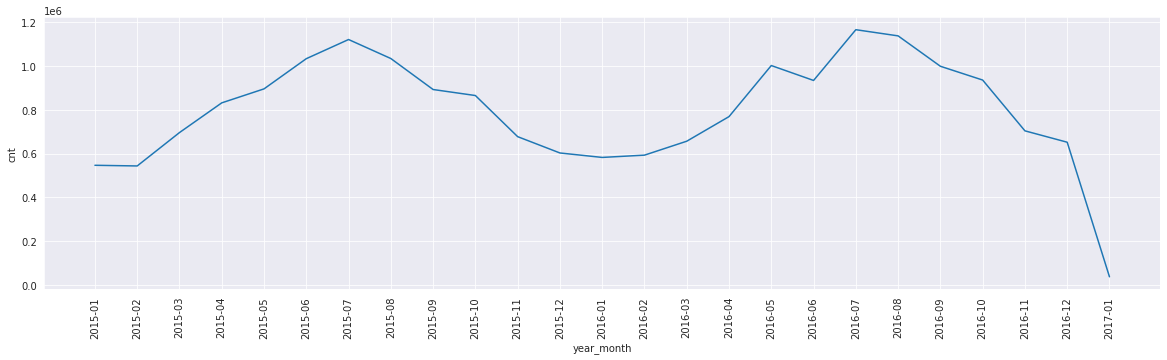

In [ ]:
# with lineplot

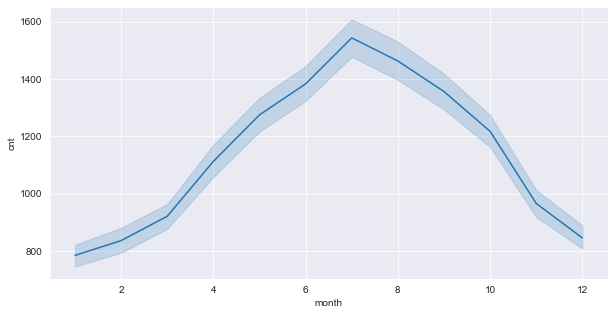

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(data = df_1, x = "month", y = "cnt")

plt.show()

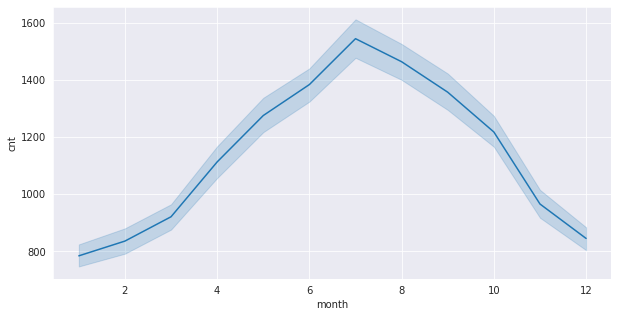

In [ ]:
# with lineplot

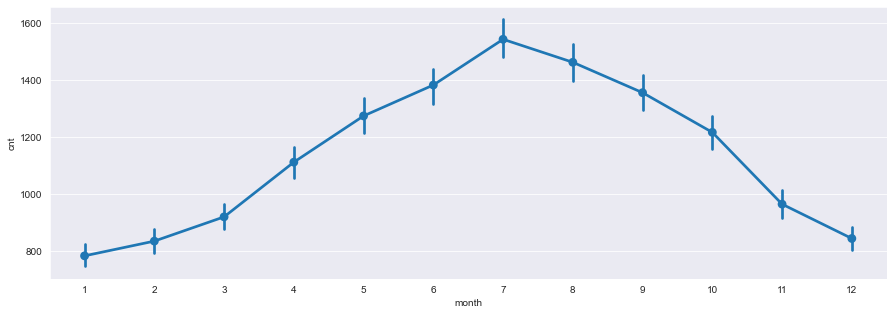

In [ ]:
plt.figure(figsize=(15,5))

sns.pointplot(data = df_1, x = "month", y = "cnt", markers = "o")

plt.show()

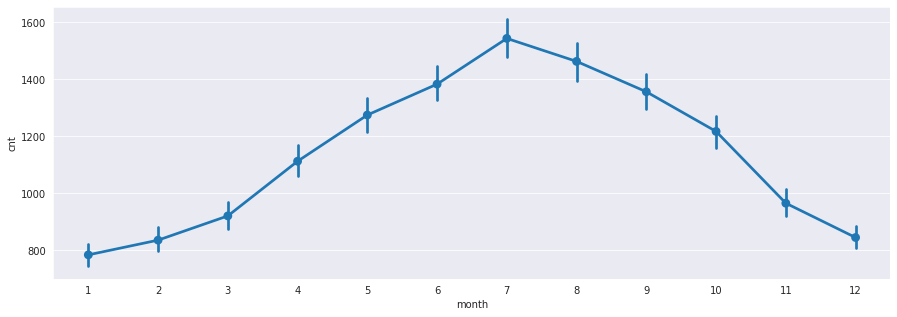

In [ ]:
# with pointplot

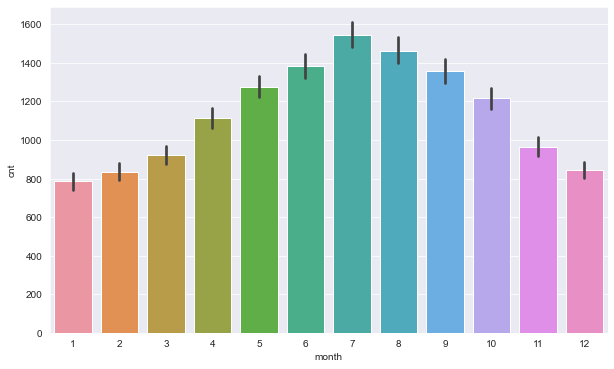

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data = df_1, x = "month", y = "cnt")

plt.show()

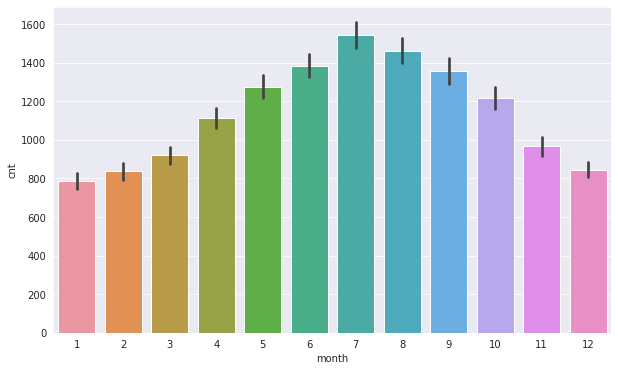

In [ ]:
# with barplot

### 11.Plot bike shares by hours on (holidays, weekend, season)

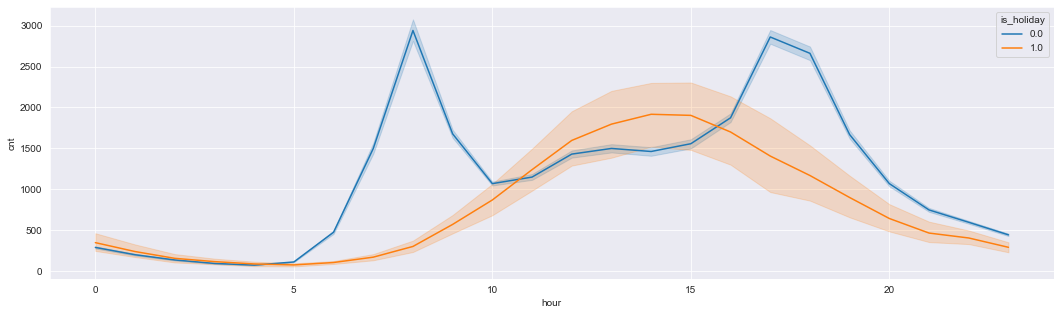

In [ ]:
plt.figure(figsize=(18,5))

sns.lineplot(data = df_1, x = "hour", y = "cnt", hue = "is_holiday")

plt.show()

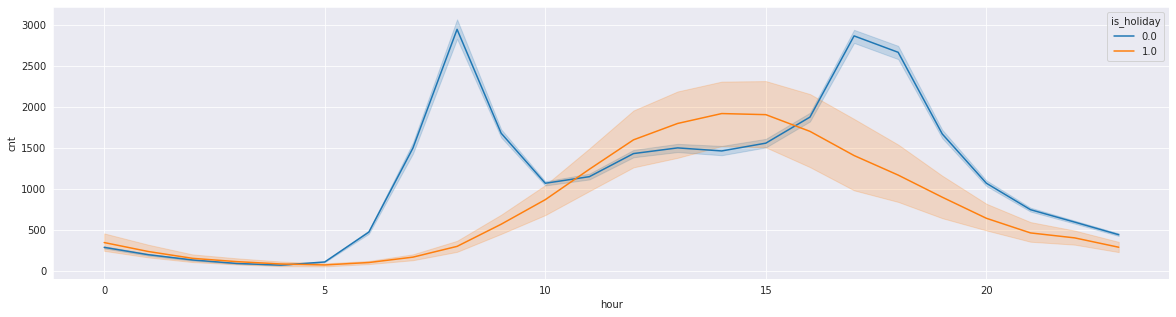

In [ ]:
# with lineplot (*whether it is a holiday or not*)

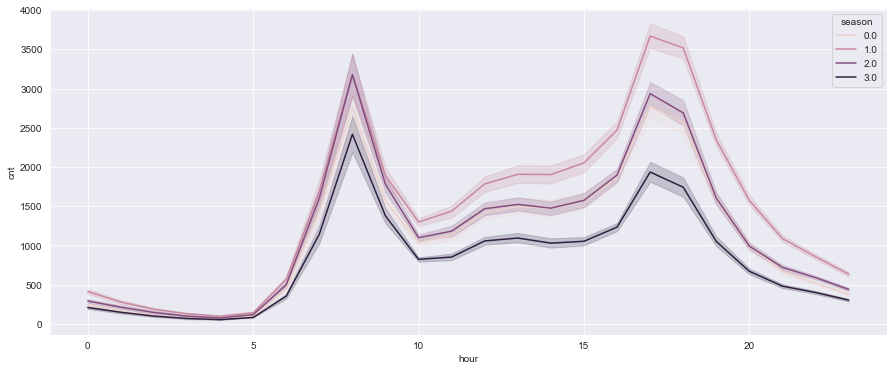

In [ ]:
plt.figure(figsize=(15,6))

sns.lineplot(data = df_1, x = "hour", y = "cnt", hue = "season")

plt.show()

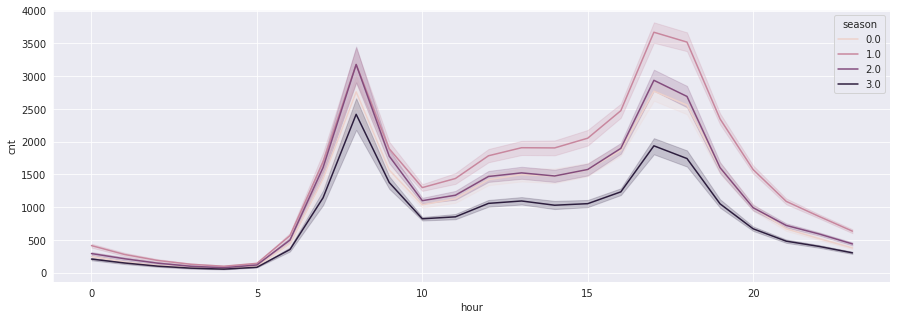

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)

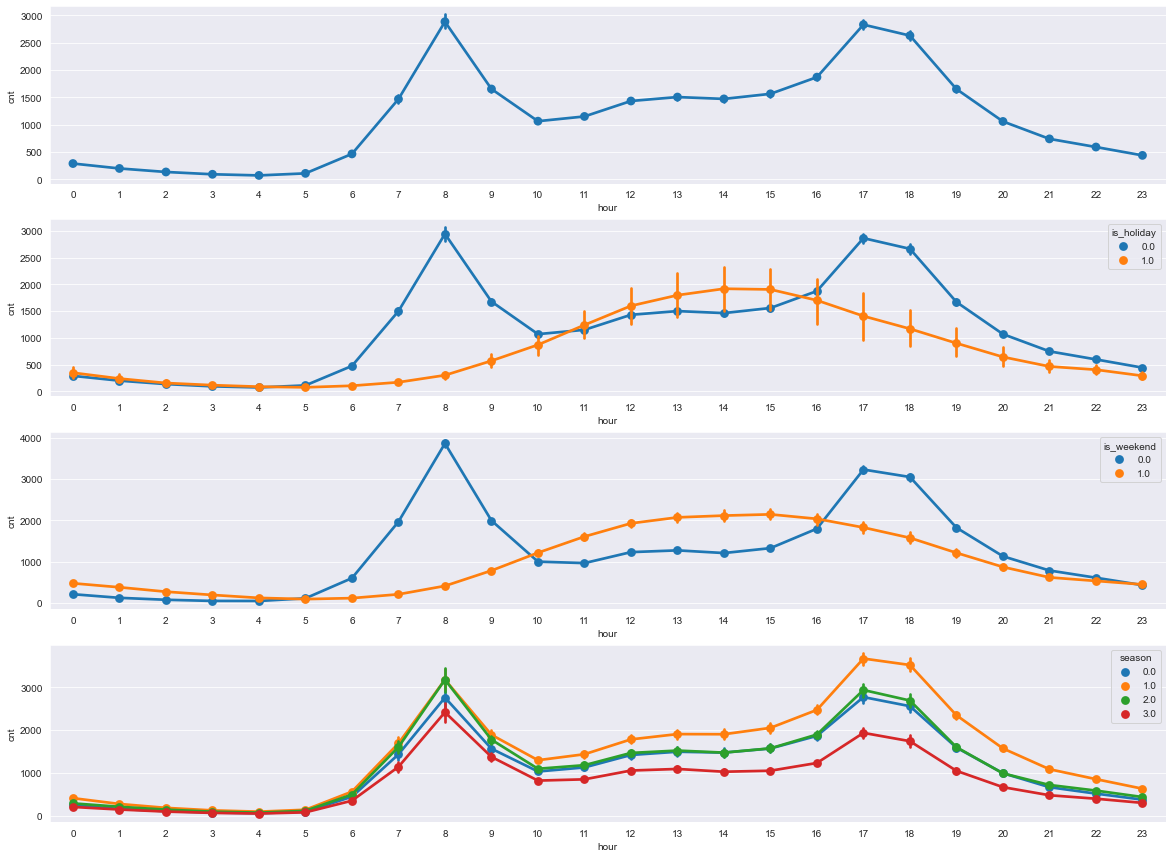

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (20,15))

sns.pointplot(data = df_1, x = "hour", y = "cnt", ax = ax[0])

sns.pointplot(data = df_1, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[1])

sns.pointplot(data = df_1, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[2])

sns.pointplot(data = df_1, x = "hour", y = "cnt", hue = "season", ax = ax[3])

plt.show()

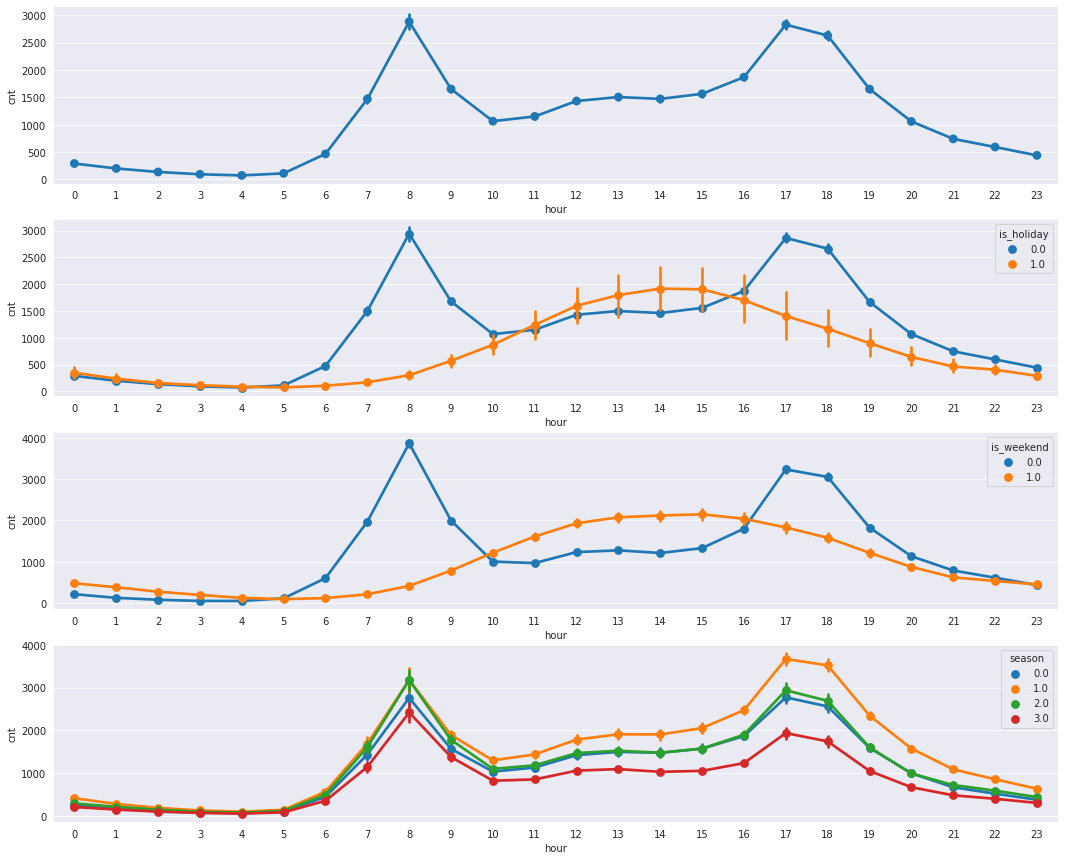

In [ ]:
# with pointplot

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

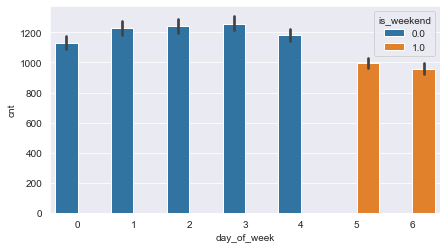

In [ ]:
plt.figure(figsize=(7,3.8))

sns.barplot(data = df_1, x = "day_of_week", y = "cnt", hue = "is_weekend")

plt.show()

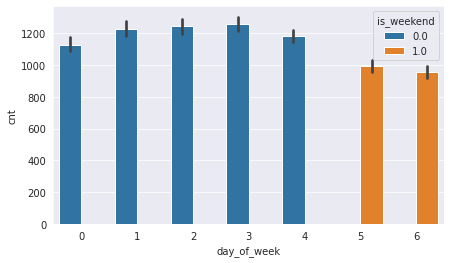

In [ ]:
# with barplot

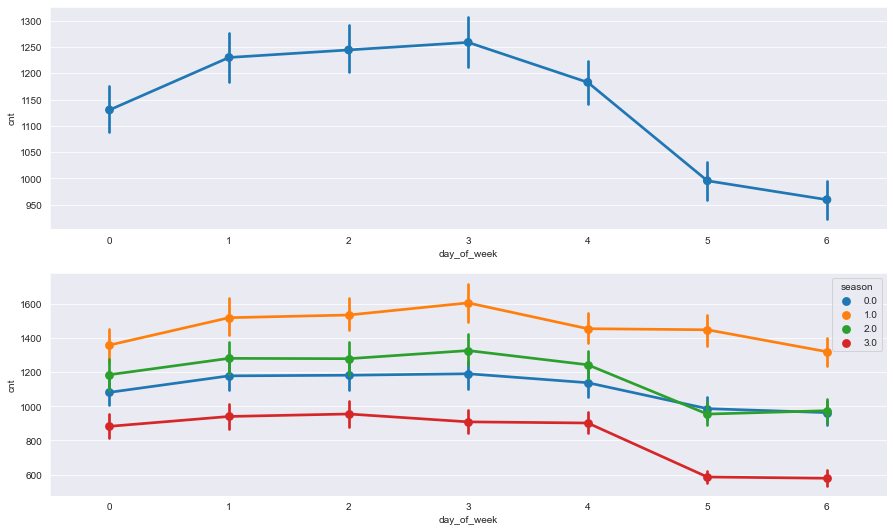

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,9))

sns.pointplot(data = df_1, x = "day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data = df_1, x = "day_of_week", y = "cnt", hue = "season", ax = ax[1])

plt.show()

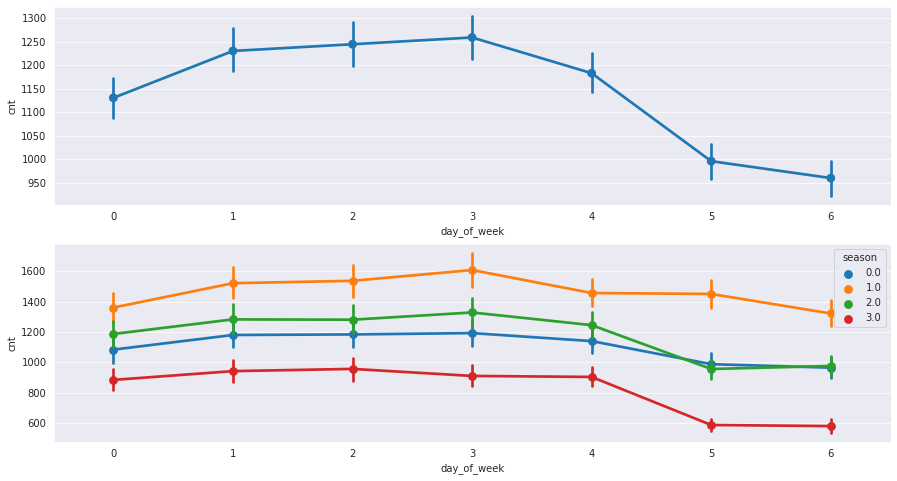

In [ ]:
# with pointplot

### 13.Plot bike shares by day of month

In [ ]:
day_of_month = df_1.groupby('day_of_month')[['cnt']].mean().astype('int').T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


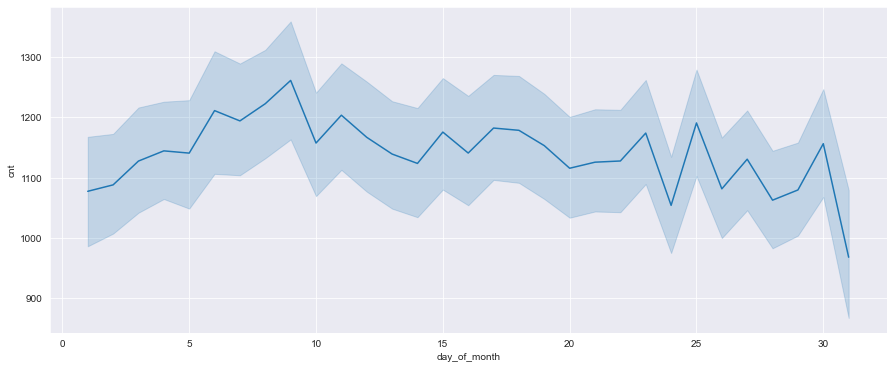

In [ ]:
display(day_of_month)

plt.figure(figsize=(15,6))

sns.lineplot(data = df_1, x = "day_of_month", y = "cnt", )

plt.show()

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


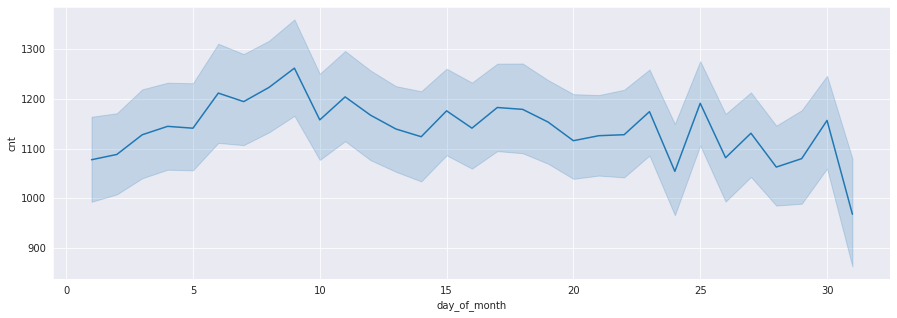

In [ ]:
#with lineplot

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

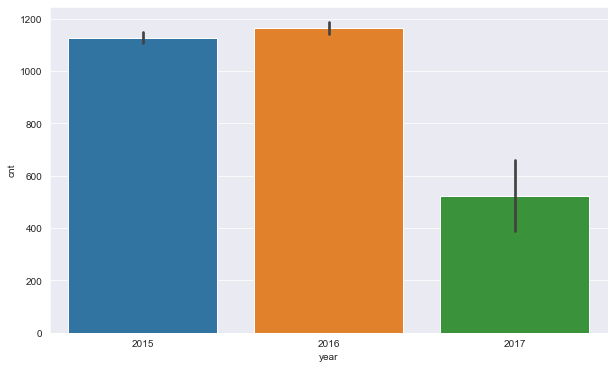

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data = df_1, x = "year", y = "cnt", )

plt.show()

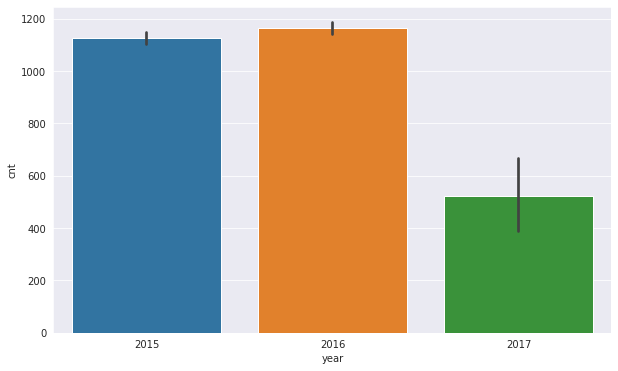

In [ ]:
# with barplot

In [ ]:
df_1["season"] != 2.0

timestamp
2015-01-04 00:00:00    True
2015-01-04 01:00:00    True
2015-01-04 02:00:00    True
2015-01-04 03:00:00    True
2015-01-04 04:00:00    True
                       ... 
2017-01-03 19:00:00    True
2017-01-03 20:00:00    True
2017-01-03 21:00:00    True
2017-01-03 22:00:00    True
2017-01-03 23:00:00    True
Name: season, Length: 17414, dtype: bool

In [ ]:
df_2 = df_1[df_1["season"] != 2]
df_2

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01,2017,1,3,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,21


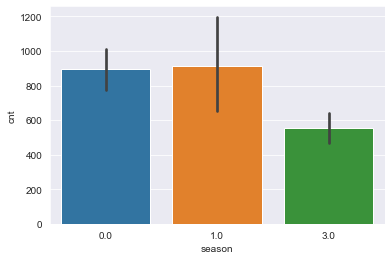

In [ ]:
is_holiday = df[df.is_holiday == 1.0]
sns.barplot(data = is_holiday, x = "season", y = "cnt");

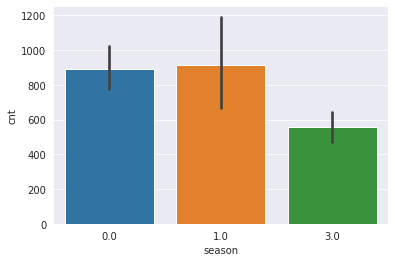

In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [ ]:
index = ["weekday", "weekend"]
index

['weekday', 'weekend']

In [ ]:
values = [12444, 4970]
values

[12444, 4970]

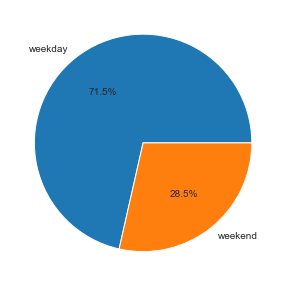

In [ ]:
plt.figure(figsize=(7,5))
y = values
mylabels = index
myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')

plt.show()

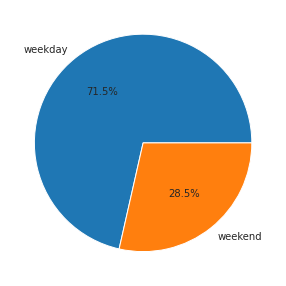

In [ ]:
# pie chart

In [ ]:
oran = df.is_weekend.value_counts().sum()/100

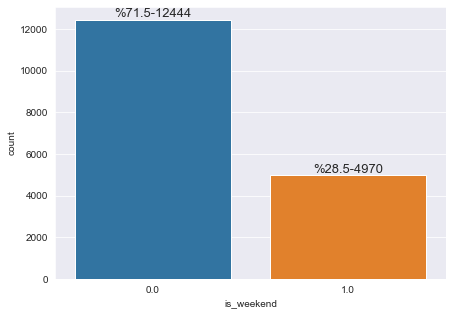

In [ ]:
plt.figure(figsize=(7,5))

sns.countplot(data = df, x = "is_weekend");
for index,value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"%{value/oran:.3}-{value}", ha="center", va="bottom", fontsize = 13)

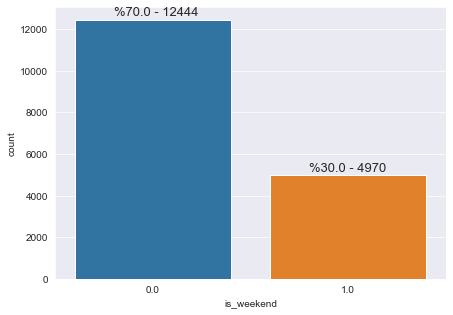

In [ ]:
# BU ŞEKİLDE ÜST BİLGİLER FARKLI ÇIKIYOR? DÜZELTEMEDİM.

fig, ax = plt.subplots(figsize=(7,5))

ax = sns.countplot(x = "is_weekend", data = df_1)
for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df.is_weekend.value_counts().sum(), 1) * 100) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()             

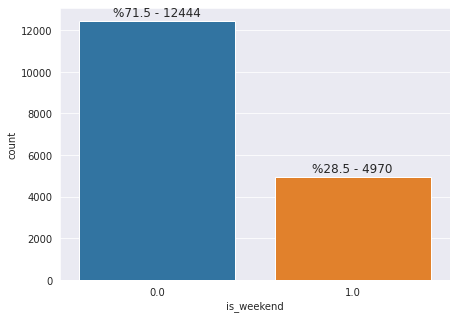

In [ ]:
# with countplot

### 16.Plot the distribution of weather code by seasons

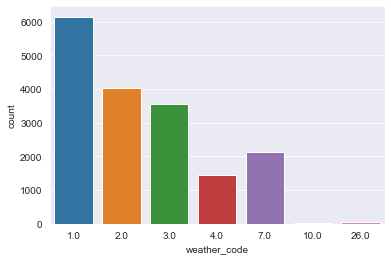

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x = "weather_code", data = df_1)

plt.show()

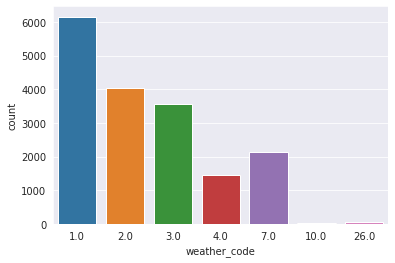

In [ ]:
# with countplot

<Figure size 432x288 with 0 Axes>

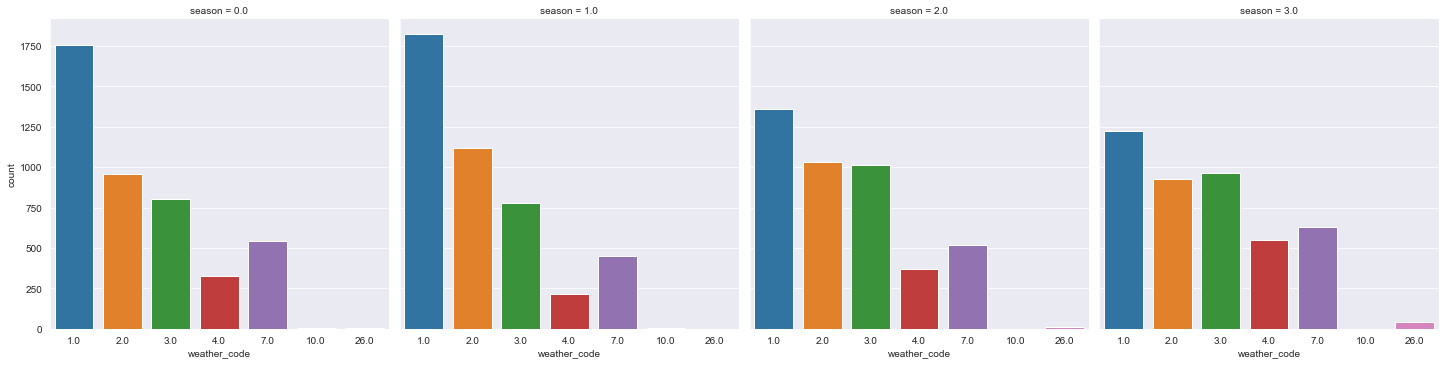

In [ ]:
plt.figure(figsize=(6,4))

sns.catplot(x = "weather_code", col = "season", col_wrap = 4, data = df_1, kind="count")

plt.show()

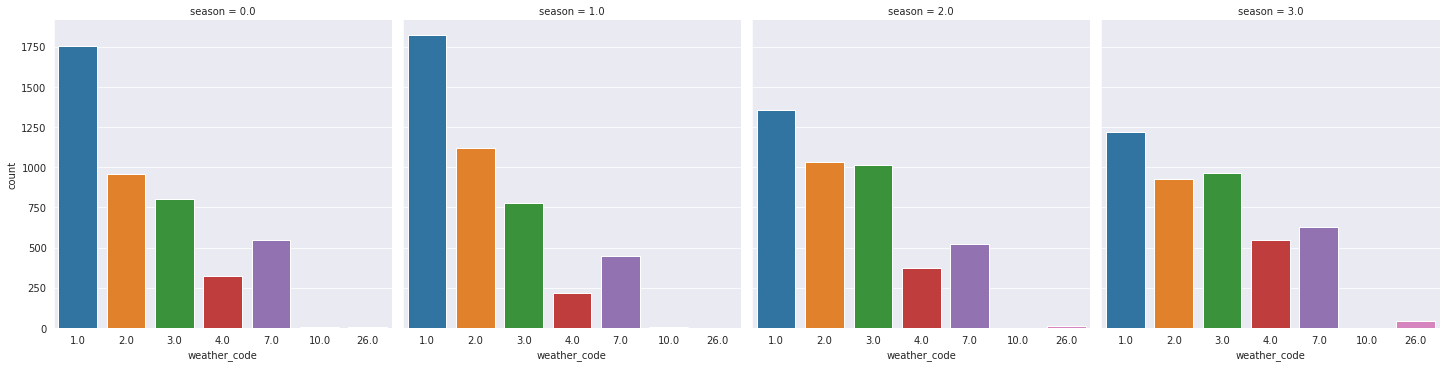

In [ ]:
# with catplot

### 17.Visulaize all the continuous variables with histogram and scatterplot

Text(0.5, 1.0, 'humidity')

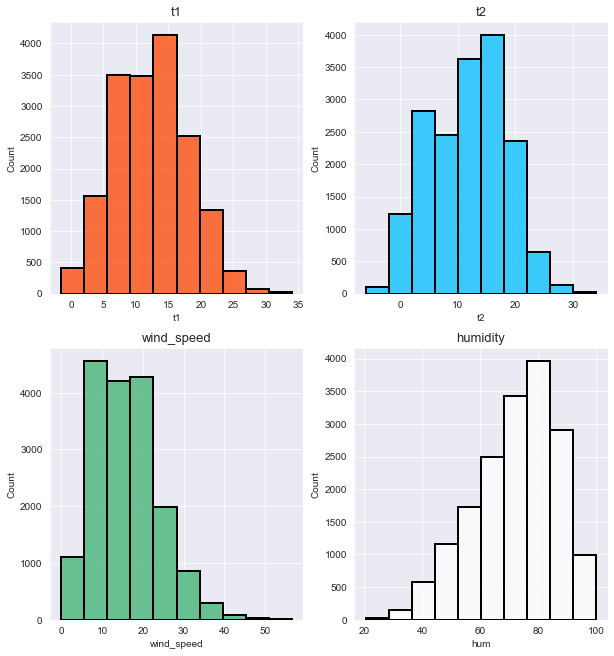

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,11))


sns.histplot(data=df_1, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df_1, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df_1, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df_1, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13)

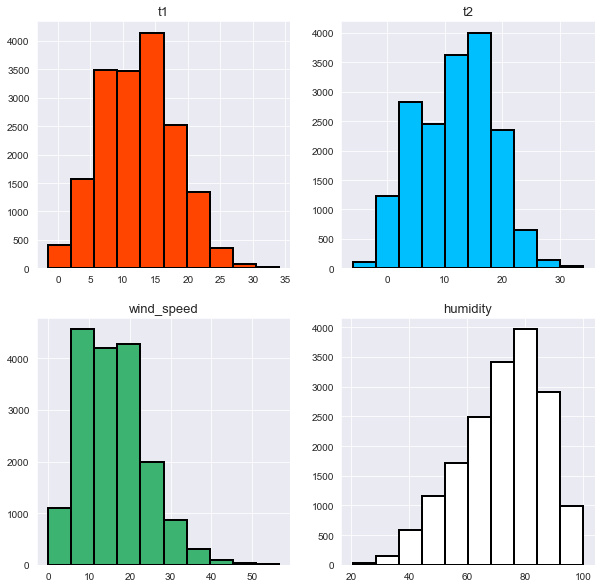

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

axes[0][0].hist(df_1["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df_1["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df_1["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df_1["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)

axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)

plt.show()

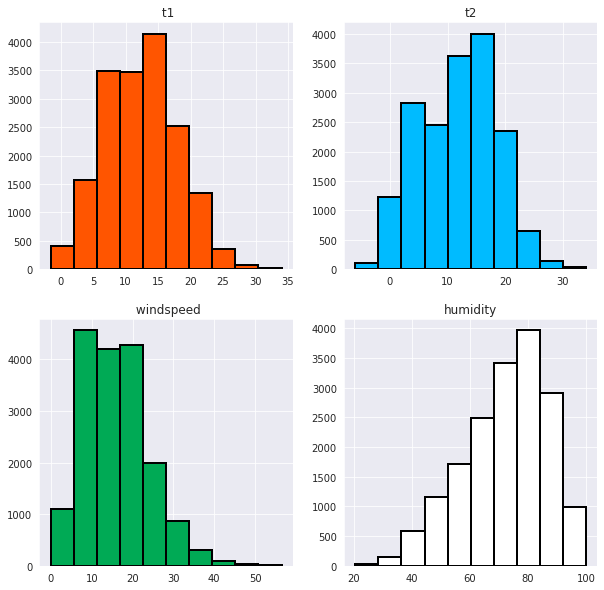

In [ ]:
# matplotlip hist

<function matplotlib.pyplot.show(close=None, block=None)>

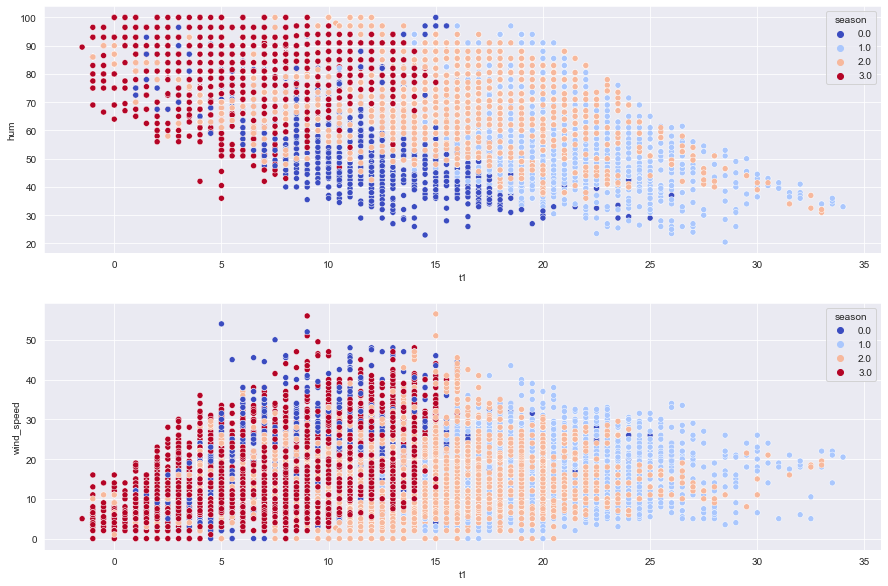

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (15,10))

sns.scatterplot(x = "t1", y = "hum", hue = "season", data = df_1, ax = ax[0], palette = "coolwarm")
sns.scatterplot(x = "t1", y = "wind_speed", hue = "season", data = df_1, ax = ax[1], palette = "coolwarm")

plt.show

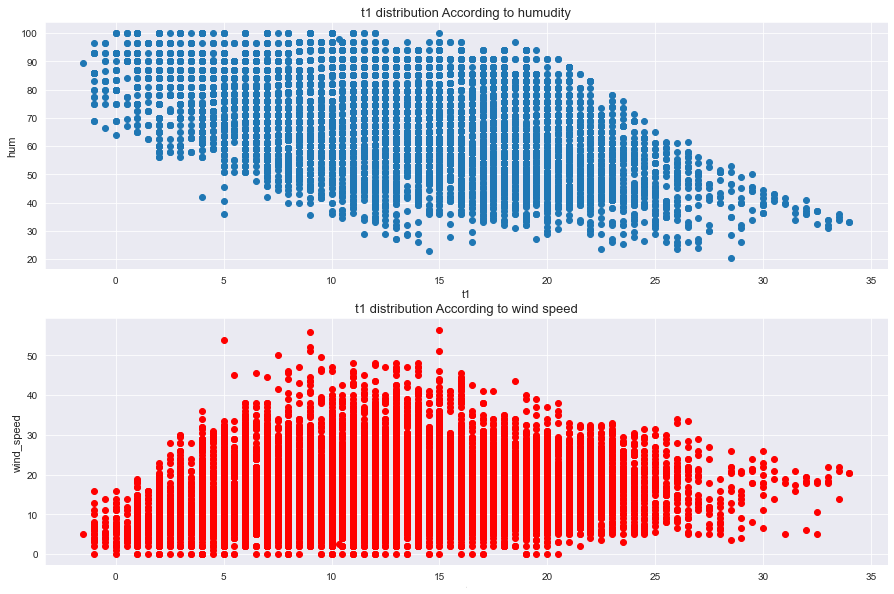

In [ ]:
# MATPLOTLİB DE YAPMAYA ÇALIŞTIM. RENK KODU VE LEGEND EKSİK
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15.1,10))


axes[0].scatter(df_1["t1"], df_1["hum"], cmap = "coolwarm")
axes[1].scatter(df_1["t1"], df_1["wind_speed"], c='red')

axes[0].set_title("t1 distribution According to humudity", fontsize = 13)
axes[1].set_title("t1 distribution According to wind speed", fontsize = 13)

axes[0].set_xlabel("t1", fontsize = 11)
axes[0].set_ylabel("hum", fontsize = 11)
axes[1].set_xlabel("t1", fontsize = 1)
axes[1].set_ylabel("wind_speed", fontsize = 11)

plt.show()

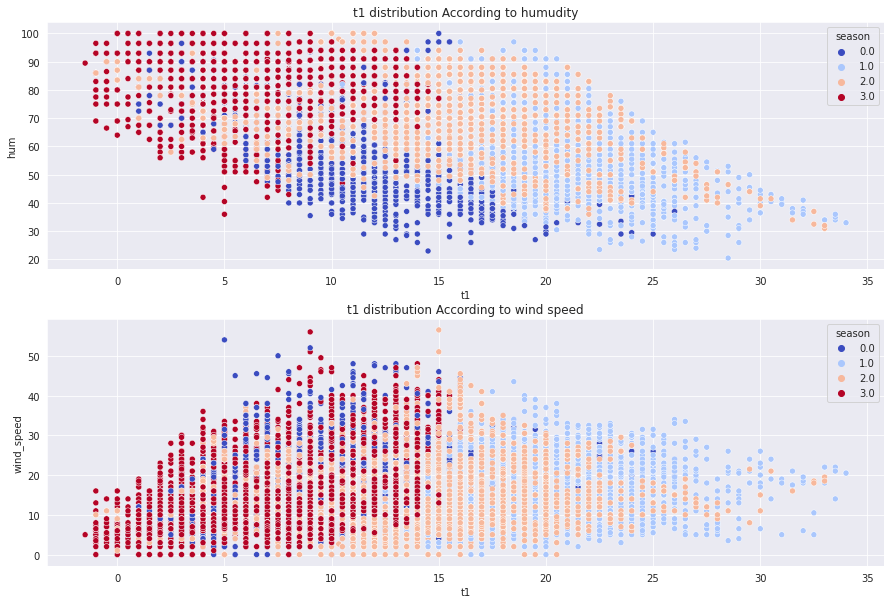

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___